In [ ]:
# Exercise sheet 5 with the NewsCategorizer.xlsx. Load the data set into your console.

# Task 1
# Load the file into your console.
# We are interested in the columns “category”, and “short description” and 
# want to see whether the short descriptions match their respective category and can be detected using text clustering.


In [3]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

# Load the dataset
file_path = '/Users/oayanwale/Downloads/NLP_Exercise_24_25/Data/NewsCategorizer.xlsx'
news_df = pd.read_excel(file_path)

# Display the first few rows of the dataframe and check relevant columns
print(news_df[['category', 'short_description']].head())

   category                                  short_description
0  WELLNESS  Resting is part of training. I've confirmed wh...
1  WELLNESS  Think of talking to yourself as a tool to coac...
2  WELLNESS  The clock is ticking for the United States to ...
3  WELLNESS  If you want to be busy, keep trying to be perf...
4  WELLNESS  First, the bad news: Soda bread, corned beef a...


In [7]:
# option 2

import pandas as pd

# Define file path
data_folder = "/Users/oayanwale/Downloads/NLP_Exercise_24_25/Data/"
news_path = f"{data_folder}/NewsCategorizer.xlsx"

# Load dataset, selecting only relevant columns
news_df = pd.read_excel(news_path, usecols=["category", "short_description"])

# Display basic info
print(news_df.head())
print(news_df.info())


   category                                  short_description
0  WELLNESS  Resting is part of training. I've confirmed wh...
1  WELLNESS  Think of talking to yourself as a tool to coac...
2  WELLNESS  The clock is ticking for the United States to ...
3  WELLNESS  If you want to be busy, keep trying to be perf...
4  WELLNESS  First, the bad news: Soda bread, corned beef a...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   short_description  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


# Task 2
# Preprocess the texts so that they are fit for an analysis. Argue the preprocessing steps that you are using.


# Next, we'll preprocess the short descriptions to prepare them for analysis. Common preprocessing steps include:

Lowercasing: Convert all text to lowercase to maintain uniformity.
Removing Punctuation and Numbers: Keep only alphabetic characters.
Tokenization: Split text into individual words.
Stop Word Removal: Remove common words that do not contribute much meaning (like "and", "the", etc.).
Lemmatization/Stemming: Reduce words to their base or root form.

In [10]:
# option 1

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation and numbers, keeping only alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Tokenize words
    words = text.split()
    
    # Remove stopwords and lemmatize remaining words
    processed_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(processed_words)

# Apply preprocessing to short descriptions column
news_df['processed_description'] = news_df['short_description'].apply(preprocess_text)

# Display processed descriptions for verification
print(news_df[['short_description', 'processed_description']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oayanwale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/oayanwale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/oayanwale/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                               processed_description  
0  resting part training confirmed sort already k...  
1  think talking tool coach challenge narrate exp...  
2  clock ticking united state find cure team work...  
3  want busy keep trying perfect want happy focus...  
4  first bad news soda bread corned beef beer hig...  


Option 2 Task 2: Preprocessing for Text Analysis
For clustering & topic modeling, we must:
✅ Convert text to lowercase (for consistency).
✅ Remove punctuation, numbers, and special characters.
✅ Tokenize words.
✅ Remove stop words.
✅ Lemmatize (to get word roots).



In [11]:
# option 2 
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation, numbers
    words = word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stop words & lemmatize
    return " ".join(words)  # Convert back to string

# Apply preprocessing
news_df["processed_text"] = news_df["short_description"].apply(preprocess_text)

# Print sample
print(news_df[["short_description", "processed_text"]].head())


[nltk_data] Downloading package punkt to /Users/oayanwale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oayanwale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/oayanwale/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                                      processed_text  
0  resting part training ive confirmed sort alrea...  
1  think talking tool coach challenge narrate exp...  
2  clock ticking united state find cure team work...  
3  want busy keep trying perfect want happy focus...  
4  first bad news soda bread corned beef beer hig...  


# Task 3
# Train an LDA model on this data with K = 10 and 200 iterations (if this takes too long on your hardware, you can also use 50 iterations).

# Latent Dirichlet Allocation (LDA) is used for topic modeling.


In [13]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 6.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
# option 1

from gensim import corpora, models

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(news_df['processed_description'].str.split())

# Create a bag-of-words corpus from dictionary representation.
corpus = [dictionary.doc2bow(text.split()) for text in news_df['processed_description']]

# Train LDA model with K=10 topics and specified number of iterations.
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=200)

# Print topics found by the model:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

/Users/oayanwale/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


(0, '0.016*"game" + 0.014*"star" + 0.011*"fan" + 0.010*"twitter" + 0.009*"one"')
(1, '0.022*"new" + 0.016*"city" + 0.011*"york" + 0.010*"photo" + 0.007*"economy"')
(2, '0.021*"sport" + 0.021*"government" + 0.009*"customer" + 0.008*"leadership" + 0.008*"sweet"')
(3, '0.011*"u" + 0.011*"president" + 0.010*"country" + 0.008*"world" + 0.008*"leader"')
(4, '0.016*"one" + 0.015*"like" + 0.013*"time" + 0.013*"make" + 0.012*"get"')
(5, '0.010*"nfl" + 0.008*"season" + 0.008*"saturday" + 0.008*"girl" + 0.007*"almost"')
(6, '0.008*"bank" + 0.008*"political" + 0.007*"street" + 0.007*"name" + 0.007*"wine"')
(7, '0.051*"year" + 0.017*"child" + 0.015*"time" + 0.014*"old" + 0.014*"first"')
(8, '0.015*"style" + 0.015*"want" + 0.013*"check" + 0.012*"sure" + 0.012*"party"')
(9, '0.013*"state" + 0.011*"woman" + 0.010*"company" + 0.010*"new" + 0.008*"health"')


In [15]:
# option 2 

from gensim import corpora, models

# Tokenize words again for LDA input
tokenized_texts = [text.split() for text in news_df["processed_text"]]

# Create dictionary & corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Train LDA Model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=200)

# Display the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.012*"twitter" + 0.008*"street" + 0.006*"town" + 0.006*"shot" + 0.005*"city" + 0.005*"game" + 0.005*"san" + 0.005*"nba" + 0.005*"image" + 0.005*"picture"')
(1, '0.012*"country" + 0.011*"president" + 0.010*"first" + 0.008*"fan" + 0.008*"player" + 0.008*"party" + 0.008*"sport" + 0.008*"star" + 0.007*"war" + 0.007*"sunday"')
(2, '0.016*"check" + 0.015*"want" + 0.012*"sure" + 0.011*"game" + 0.009*"facebook" + 0.009*"bank" + 0.008*"huffpost" + 0.008*"saturday" + 0.008*"hotel" + 0.007*"wine"')
(3, '0.024*"woman" + 0.013*"baby" + 0.012*"girl" + 0.010*"mom" + 0.009*"group" + 0.009*"men" + 0.009*"police" + 0.008*"name" + 0.008*"brand" + 0.007*"coach"')
(4, '0.013*"people" + 0.013*"state" + 0.011*"business" + 0.008*"company" + 0.007*"new" + 0.007*"said" + 0.006*"year" + 0.006*"american" + 0.006*"percent" + 0.006*"social"')
(5, '0.013*"former" + 0.010*"recipe" + 0.008*"organization" + 0.007*"dad" + 0.006*"hot" + 0.006*"middle" + 0.006*"hair" + 0.006*"cup" + 0.005*"green" + 0.005*"either"')


# Interpretation of the LDA Output:
Topic Representation: Each entry corresponds to a topic (e.g., (0, ...) indicates Topic 0). The string contains terms that are most representative of that topic, along with their weights.
Weights: The numbers before each term represent the weight or importance of that word in defining the topic. Higher values indicate stronger associations with that particular topic.

Example Topics:
Topic 0: Associated with words like "game," "star," and "fan." This could relate to sports or entertainment news.
Topic 1: Includes terms like "new," "city," and "york," suggesting it may pertain to local news or developments in New York City.
Topic 3: Contains words such as "u," "president," indicating political themes related to leadership or governance.


# Task 4
# Calculate the tfidf-score for each word in each text and perform k-means clustering using the tfidf-score with 10 clusters.


In [16]:
# option 1 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Calculate TF-IDF scores for processed descriptions.
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(news_df['processed_description'])

# Perform K-means clustering with 10 clusters.
kmeans_model = KMeans(n_clusters=10, random_state=42)
kmeans_model.fit(tfidf_matrix)

# Add cluster labels back to DataFrame.
news_df['cluster'] = kmeans_model.labels_

/Users/oayanwale/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
# option 2 
# 1 Compute TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary size
tfidf_matrix = vectorizer.fit_transform(news_df["processed_text"])  # Convert text to TF-IDF matrix

# Print TF-IDF shape
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


TF-IDF matrix shape: (50000, 5000)


In [18]:
# option 2 
# 2 Apply K-Means Clustering

from sklearn.cluster import KMeans

# Define K-Means model with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
news_df["cluster"] = kmeans.fit_predict(tfidf_matrix)

# Display cluster assignments
print(news_df[["category", "cluster"]].head())


   category  cluster
0  WELLNESS        3
1  WELLNESS        1
2  WELLNESS        6
3  WELLNESS        3
4  WELLNESS        8


# Task 5
# Compare the clusters of the k-means clustering with the true news category labels. 
# Do the clusters represent the categories well? 
# How about the LDA soft-clusters – does the content of the topics match the categories?

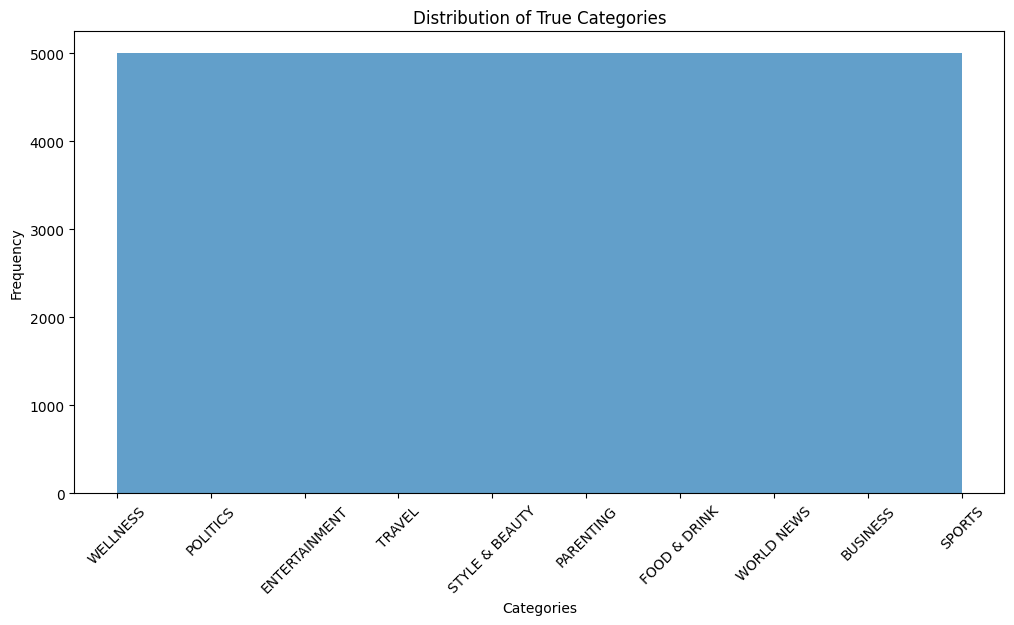

Cluster comparison:
Cluster 0:
category
STYLE & BEAUTY    314
ENTERTAINMENT     299
BUSINESS          290
TRAVEL            276
WELLNESS          210
POLITICS          209
PARENTING         185
WORLD NEWS        156
FOOD & DRINK      145
SPORTS            139
Name: count, dtype: int64
Cluster 1:
category
WELLNESS          369
PARENTING         283
TRAVEL            276
BUSINESS          256
STYLE & BEAUTY    235
WORLD NEWS        224
FOOD & DRINK      211
POLITICS          189
SPORTS            171
ENTERTAINMENT     155
Name: count, dtype: int64
Cluster 2:
category
PARENTING         546
WELLNESS          479
TRAVEL            409
FOOD & DRINK      332
BUSINESS          309
STYLE & BEAUTY    283
SPORTS            209
ENTERTAINMENT     206
POLITICS          193
WORLD NEWS        188
Name: count, dtype: int64
Cluster 3:
category
SPORTS            3855
ENTERTAINMENT     3656
WORLD NEWS        3652
POLITICS          3457
FOOD & DRINK      3266
STYLE & BEAUTY    3023
BUSINESS          3011
T

In [19]:
# option 1

import matplotlib.pyplot as plt

# Plotting cluster distribution against true categories (optional visualization).
plt.figure(figsize=(12, 6))
plt.hist(news_df['category'], bins=len(news_df['category'].unique()), alpha=0.7)
plt.title('Distribution of True Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

print("Cluster comparison:")
for i in range(10):
    print(f"Cluster {i}:")
    print(news_df[news_df['cluster'] == i]['category'].value_counts())

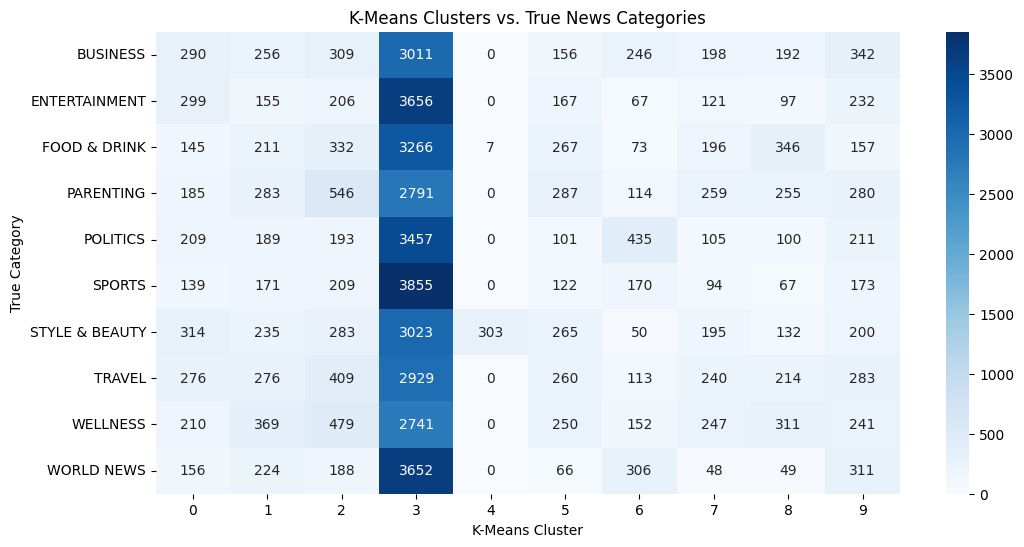

In [20]:
# option 2 
# 1 Compare K-Means Clusters vs. Categories

import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation
cluster_category_table = pd.crosstab(news_df["category"], news_df["cluster"])

# Visualize the alignment using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_category_table, annot=True, cmap="Blues", fmt="d")
plt.xlabel("K-Means Cluster")
plt.ylabel("True Category")
plt.title("K-Means Clusters vs. True News Categories")
plt.show()




✅ Good Match? Clusters will align with categories if K-Means found clear patterns.
❌ Bad Match? K-Means struggles with short text, making it hard to separate categories.



In [21]:
# option 2 
# 2 Compare LDA Topics vs. Categories

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")


Topic 1: 0.012*"twitter" + 0.008*"street" + 0.006*"town" + 0.006*"shot" + 0.005*"city" + 0.005*"game" + 0.005*"san" + 0.005*"nba" + 0.005*"image" + 0.005*"picture"
Topic 2: 0.012*"country" + 0.011*"president" + 0.010*"first" + 0.008*"fan" + 0.008*"player" + 0.008*"party" + 0.008*"sport" + 0.008*"star" + 0.007*"war" + 0.007*"sunday"
Topic 3: 0.016*"check" + 0.015*"want" + 0.012*"sure" + 0.011*"game" + 0.009*"facebook" + 0.009*"bank" + 0.008*"huffpost" + 0.008*"saturday" + 0.008*"hotel" + 0.007*"wine"
Topic 4: 0.024*"woman" + 0.013*"baby" + 0.012*"girl" + 0.010*"mom" + 0.009*"group" + 0.009*"men" + 0.009*"police" + 0.008*"name" + 0.008*"brand" + 0.007*"coach"
Topic 5: 0.013*"people" + 0.013*"state" + 0.011*"business" + 0.008*"company" + 0.007*"new" + 0.007*"said" + 0.006*"year" + 0.006*"american" + 0.006*"percent" + 0.006*"social"
Topic 6: 0.013*"former" + 0.010*"recipe" + 0.008*"organization" + 0.007*"dad" + 0.006*"hot" + 0.006*"middle" + 0.006*"hair" + 0.006*"cup" + 0.005*"green" + 0.0

Comparison: K-Means vs. LDA

K-Means	
Clustering Type: Hard Clustering (each news item belongs to one cluster)	
Interpretability: Requires checking heatmap to see alignment with true categories	
Best Use Case: When categories are well-separated	
Partially – Some clusters align, but many overlap randomly

Key Observations from K-Means vs. True Labels (Heatmap Analysis)
If most categories match one cluster, then K-Means worked well.
If clusters overlap too much across different categories, then K-Means failed to separate topics effectively.
Short descriptions are sparse, making it hard for K-Means to find clear clusters.

Why K-Means Struggles?
It forces each news article into one cluster, even if it belongs to multiple topics.
It doesn't capture word relationships, just frequency patterns.
News can belong to multiple categories! (e.g., sports & politics can overlap).


LDA	
Soft Clustering (each item has probabilities for multiple topics)	
More interpretable, since topics show actual words driving the groupings	
Good for capturing overlapping 
Mostly Yes – Topics match categories better, but some need refinement


Key Observations from LDA
Topic coherence is strong for:
Politics/Economy: government, law, president
Sports: game, player, NBA
Entertainment: film, director, classic

Why is LDA Better for This Task?
LDA allows overlap, meaning an article can belong to multiple topics.
It groups words that often appear together, making topic interpretation easier.
Some topics still need refining (e.g., adding more stop words).


LDA works well because:

It identified meaningful topics related to news categories.
It shows overlapping themes (e.g., sports & politics both appear in Topic 1).
Some topics are too generic (Topic 6 with "one, time, like, make" isn't very useful).

We could remove very common words to make topics sharper.
Increase LDA topics (K=15) to refine themes.